# Problem Statement:
The goal of this project is to build a machine learning model that can accurately predict payment fraud by distinguishing between legitimate and fraudulent transactions based on their characteristics, such as transaction amount, type, and accounts involved. By using a dataset of both fraudulent and non-fraudulent financial transactions, the model can be trained to achieve high accuracy, which can be used by financial institutions to prevent financial losses and protect their customers' assets in real-time.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path ="C:\\Users\\Asus\\Desktop\\PROJECT\\Dataset - Copy.csv"
df = pd.read_csv(file_path)
df.shape

(1048575, 10)

# Data Description:
1.step: represents a unit of time where 1 step equals 1 hour. 



2.type: The type of transaction, including PAYMENT, TRANSFER, CASH_OUT, and DEBIT.

3.amount: The amount of the transaction.

4.nameOrig: The ID of the account that initiated the transaction.

5.oldbalanceOrg: The balance in the origin account before the transaction

6.newbalanceOrig: The balance in the origin account after the transaction.

7.nameDest: The ID of the account that received the transaction.

8.oldbalanceDest: The balance in the destination account before the transaction.

9.newbalanceDest: The balance in the destination account after the transaction.

10.isFraud: A binary flag indicating whether the transaction is fraudulent (1) or not (0).

# Exploratory Data Analysis

In [3]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,10039.64,C1231006920,170140.00,235296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19390.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,290.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,290.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [4]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048565,95,TRANSFER,132387.24,C1654402840,15956.51,0.00,C1878219072,631284.08,763671.32,0
1048566,95,PAYMENT,125100.15,C565523855,30601.00,18002.85,M1740980642,0.00,0.00,0
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0
1048568,95,PAYMENT,20721.54,C954269986,49732.00,29010.46,M812667644,0.00,0.00,0
1048569,95,PAYMENT,3210.11,C2113264897,11113.00,7902.89,M1989479599,0.00,0.00,0
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,2.155673e+05,8.740847e+05,8.950874e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,1.035837e+06,2.972030e+06,3.015016e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.244322e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,8.044852e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.246821e+05,1.376130e+05,1.756173e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,2.900061e+08,3.890000e+07,3.900000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
#Checking for null vallues
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
df.nunique()

step                   95
type                    5
amount            1008012
nameOrig          1048314
oldbalanceOrg      390694
newbalanceOrig     440760
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

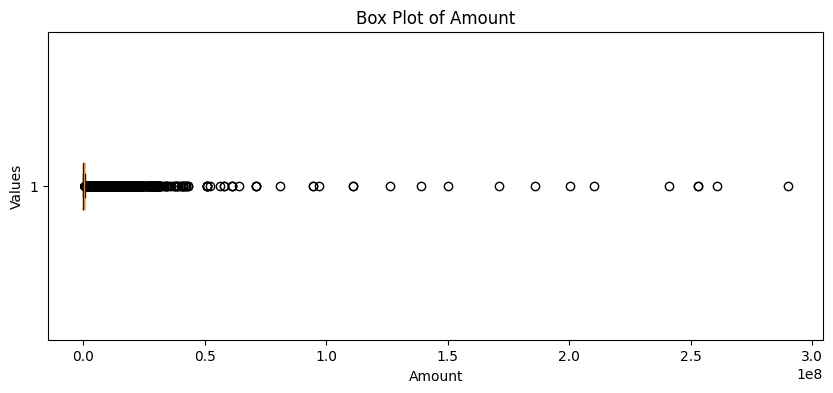

In [9]:
#Checking ffor outliers

plt.figure(figsize=(10, 4))
plt.boxplot(df['amount'],vert= False)

# Set labels and title
plt.xlabel('Amount')
plt.ylabel('Values')
plt.title('Box Plot of Amount')

# Show the plot
plt.show()

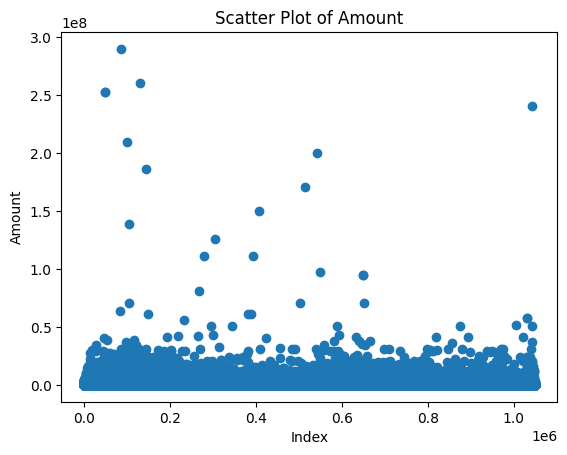

In [10]:
plt.scatter(df.index, df['amount'])

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')

# Show the plot
plt.show()

In [11]:


# Find outliers using IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
         step      type      amount     nameOrig  oldbalanceOrg  \
84          1  TRANSFER  3710056.23  C1449772539           0.00   
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
...       ...       ...         ...          ...            ...   
1048085    95  CASH_OUT   741008.89  C1386640487         316.00   
1048139    95  TRANSFER  1642975.23  C1030530719      217134.41   
1048468    95  TRANSFER  1008558.95   C683492649      197014.15   
1048483    95   CASH_IN  3459100.11  C1864721083        5010.00   
1048502    95  CASH_OUT  2221005.32  C1204350021           0.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
84                 0.00  C1590550415       900180.00     19200000.00        0  
85                 0.00  

In [12]:
outliers.shape

(66708, 10)

In [13]:
print(len(outliers[outliers.isFraud == 1]))

469


In [14]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1047433
Number of Fraud transactions:  1142
Percentage of Legit transactions: 99.8911 %
Percentage of Fraud transactions: 0.1089 %


In [15]:
#df = df.drop(outliers.index)
#df.reset_index(drop=True, inplace=True)


Clearly this is an highly imbalanced dataset.Removing or averaging out outliers may make the model biased

# Visualisation

([<matplotlib.patches.Wedge at 0x154b4930e50>,
 [Text(-1.0999935613563063, 0.003763638488259466, ''),
  Text(1.0999935613686946, -0.003763634867559027, '')],
 [Text(-0.5999964880125306, 0.002052893720868799, '99.8911%'),
  Text(0.5999964880192878, -0.0020528917459412873, '0.1089%')])

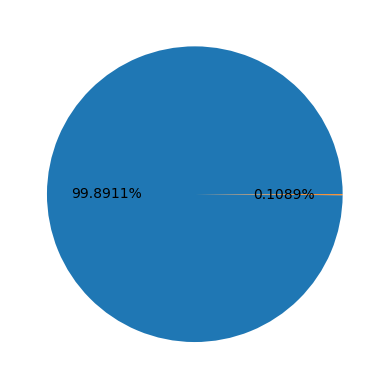

In [16]:
plt.pie(df['isFraud'].value_counts(),  autopct='%.4f%%')

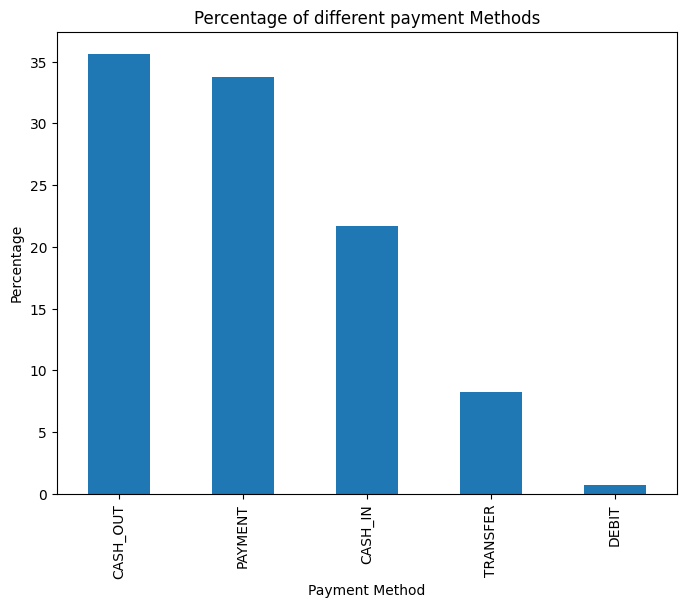

In [17]:
payment_counts = df['type'].value_counts()
payment_percentage = (payment_counts/ payment_counts.sum()) *100

plt.figure(figsize=(8,6))
payment_percentage.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel("Percentage")
plt.title("Percentage of different payment Methods")

plt.show()

type
CASH_OUT    50.61296
TRANSFER    49.38704
Name: count, dtype: float64


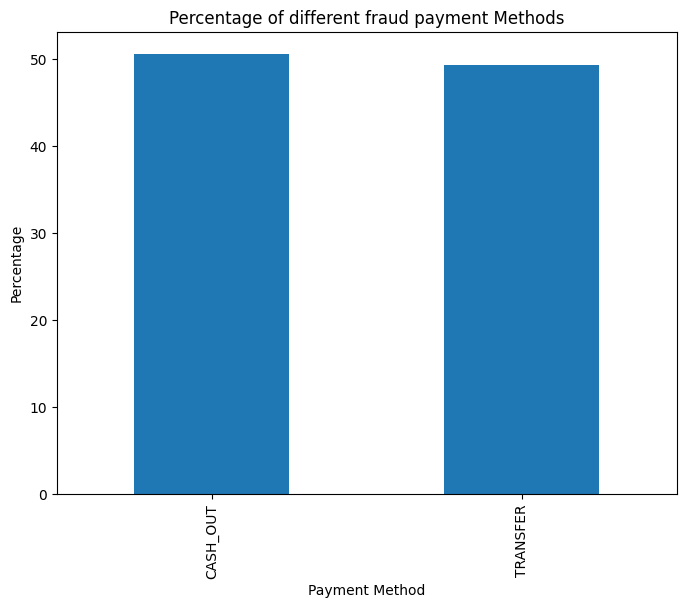

In [18]:
fraud_df = df[df['isFraud'] == 1]
legit_df = df[df['isFraud'] == 0]

payment_counts_fraud = fraud_df['type'].value_counts()
payment_percentages_fraud = (payment_counts_fraud/payment_counts_fraud.sum())*100


print(payment_percentages_fraud)
plt.figure(figsize=(8,6))
payment_percentages_fraud.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel("Percentage")
plt.title("Percentage of different fraud payment Methods")

plt.show()

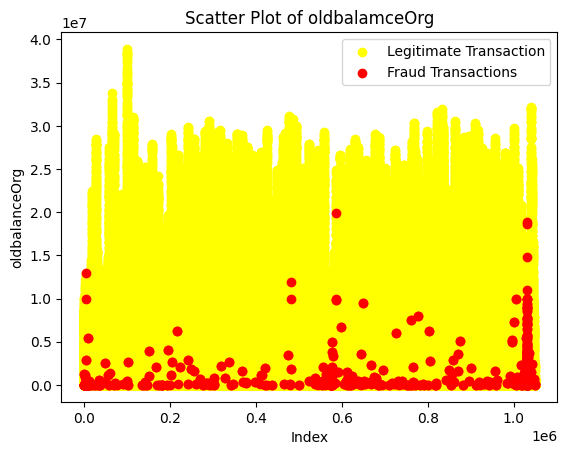

In [19]:
plt.scatter(legit_df.index,legit_df['oldbalanceOrg'],color = 'yellow',label ='Legitimate Transaction')
plt.scatter(fraud_df.index,fraud_df['oldbalanceOrg'],color = 'red',label ='Fraud Transactions')

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter Plot of oldbalamceOrg')

plt.legend()

plt.show()

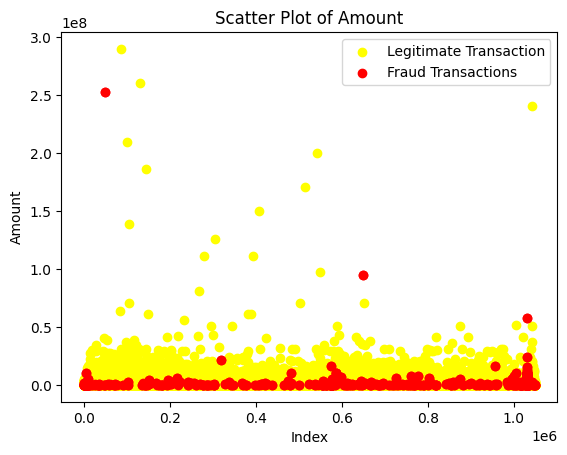

In [20]:
plt.scatter(legit_df.index,legit_df['amount'],color = 'yellow',label ='Legitimate Transaction')
plt.scatter(fraud_df.index,fraud_df['amount'],color = 'red',label ='Fraud Transactions')

plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')

plt.legend()

plt.show()

# Problem solving

In [21]:
new_df =  df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [22]:
obJList = new_df.select_dtypes(include="object").columns
print(obJList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


# Label Encoding


In [23]:
#Label Encoding for object datatypes for numeric conversion
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in obJList:
    new_df[i] = label_encoder.fit_transform(new_df[i].astype(str))

print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  int32  
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  int32  
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int32(3), int64(2)
memory usage: 68.0 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,10039.64,125163,170140.0,235296.36,274917,0.0,0.0,0
1,1,3,1864.28,361318,21249.0,19390.72,286716,0.0,0.0,0
2,1,4,290.00,165235,181.0,0.00,73550,0.0,0.0,1
3,1,1,290.00,961097,181.0,0.00,65464,21182.0,0.0,1
4,1,3,11668.14,567902,41554.0,29885.86,138001,0.0,0.0,0


# Multicolinearity

<Axes: >

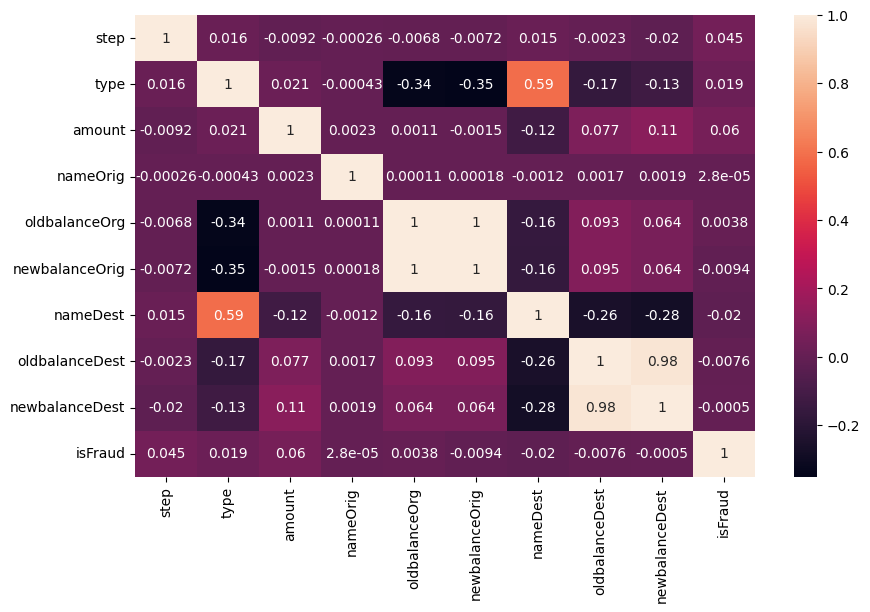

In [24]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [25]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values ,i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)
    

,variables,VIF
0,step,2.820884
1,type,4.587148
2,amount,1.099388
3,nameOrig,2.803105
4,oldbalanceOrg,451.787264
5,newbalanceOrig,455.942379
6,nameDest,3.458114
7,oldbalanceDest,32.278631
8,newbalanceDest,33.429659
9,isFraud,1.076721


In [26]:
new_df['Amount_Orig'] = new_df.apply(lambda x : x['oldbalanceOrg'] -x['newbalanceOrig'],axis = 1)
new_df['Amount_Dest'] = new_df.apply(lambda x : x['newbalanceDest'] -x['oldbalanceDest'],axis = 1)

new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

  

,variables,VIF
0,step,2.024356
1,type,2.077692
2,amount,1.082564
3,isFraud,1.073309
4,Amount_Orig,1.164950
5,Amount_Dest,1.166407


<Axes: >

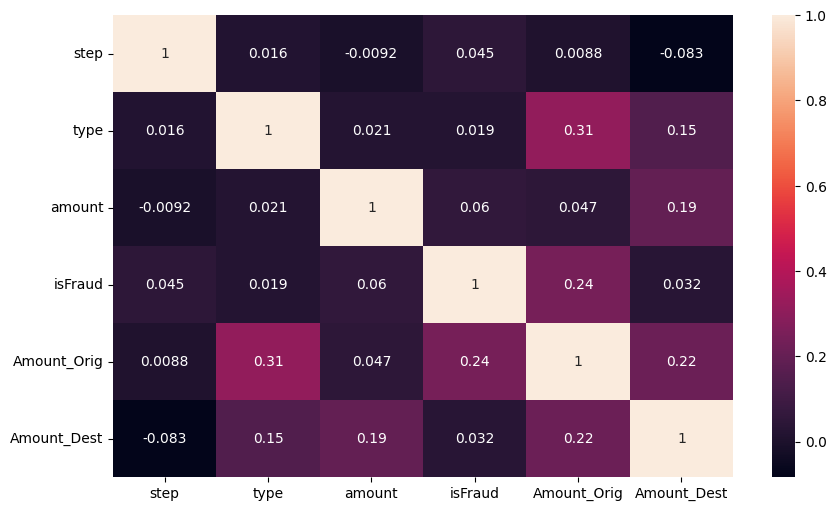

In [27]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [28]:
new_df.head()

,step,type,amount,isFraud,Amount_Orig,Amount_Dest
0,1,3,10039.64,0,-65156.36,0.0
1,1,3,1864.28,0,1858.28,0.0
2,1,4,290.00,1,181.00,0.0
3,1,1,290.00,1,181.00,-21182.0
4,1,3,11668.14,0,11668.14,0.0


# Model Buliding

In [29]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [30]:
# Perform Scaling
scaler = StandardScaler()
new_df["Normalized_Amount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df["Normalized_step"] = scaler.fit_transform(new_df["step"].values.reshape(-1, 1))
new_df["Nrmalized_type"] = scaler.fit_transform(new_df["type"].values.reshape(-1, 1))
new_df["Normalized_Account_orig"] = scaler.fit_transform(new_df["Amount_Orig"].values.reshape(-1, 1))
new_df["Normalized_Account_Dest"] = scaler.fit_transform(new_df["Amount_Dest"].values.reshape(-1, 1))
new_df.drop(["amount","step","type","Amount_Orig","Amount_Dest"], inplace= True, axis= 1)



new_df.head()

,isFraud,Normalized_Amount,Normalized_step,Nrmalized_type,Normalized_Account_orig,Normalized_Account_Dest
0,0,-0.198417,-1.662022,0.956576,-0.270661,-0.269872
1,0,-0.206310,-1.662022,0.956576,0.140138,-0.269872
2,1,-0.207829,-1.662022,1.700067,0.129856,-0.269872
3,1,-0.207829,-1.662022,-0.530406,0.129856,-0.311893
4,0,-0.196845,-1.662022,0.956576,0.200272,-0.269872


# Train Test Split

In [31]:
# Split the data

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)


(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state=22)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (838860, 5)
Shape of X_test:  (209715, 5)


In [32]:
#Logic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


log_reg = LogisticRegression(C=0.001,penalty="l2")
log_reg.fit(X_train,Y_train)


y_pred = log_reg.predict(X_test)
logic_regression_score = log_reg.score(X_test, Y_test)*100





In [33]:
# DECISION TREE

decision_tree = DecisionTreeClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=1)
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [34]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [35]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)
print("Logic Regression Score: ", logic_regression_score)

Random Forest Score:  99.96709820470639
Decision Tree Score:  99.94802470018836
Logic Regression Score:  99.91035452876524


# Precisison
Out of the total predicted positive results how many are actual positive.

Precision  = True Positive/(True Positive + False Positive)

# Recall
Out of the total actual positive values how many positive area actual there.

Recall = True Positive/(True Positive + False Negative)




# Case1
 Actual - Fraud 

Predicted - Fraud

# Case2
Actual - Not Fraud

Predicted - Not Fraud

# Case 3
Actual - Not Fraud

Predicted - Fraud

# Case 4
Actual - Fraud

Predicted -  Not Fraud

# RANDOM FOREST

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209483
           1       0.95      0.75      0.83       232

    accuracy                           1.00    209715
   macro avg       0.97      0.87      0.92    209715
weighted avg       1.00      1.00      1.00    209715

Confusion Matrix - Random Forest


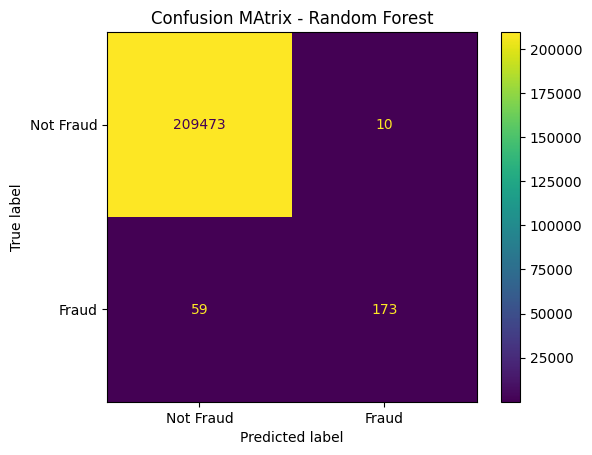

In [36]:
# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

#confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test,Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
display_labels = ['Not Fraud', 'Fraud']  
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf,display_labels=display_labels)
matrix.plot()
plt.title("Confusion MAtrix - Random Forest")
plt.show()

precision_random_forest = precision_score(Y_test, Y_pred_rf)
recall_random_forest = recall_score(Y_test, Y_pred_rf)






# DECISION TREE


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209483
           1       0.76      0.77      0.77       232

    accuracy                           1.00    209715
   macro avg       0.88      0.88      0.88    209715
weighted avg       1.00      1.00      1.00    209715

Confusion Matrix - Decision Tree


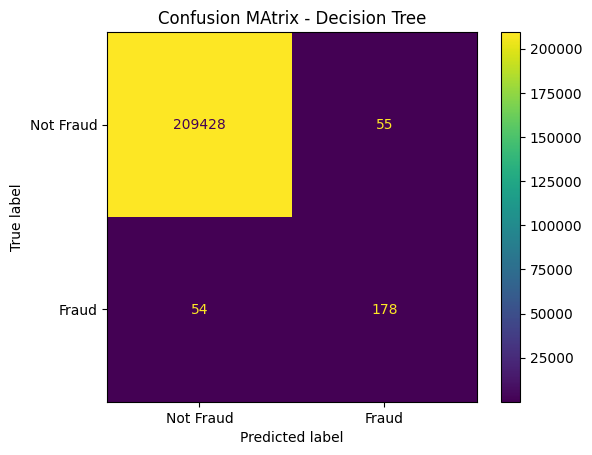

In [37]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

#confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test,Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt,display_labels=display_labels)
matrix.plot()
plt.title("Confusion MAtrix - Decision Tree")
plt.show()

precision_decision_tree = precision_score(Y_test, Y_pred_dt)
recall_decision_tree = recall_score(Y_test, Y_pred_dt)

# LOGISTIC REGRESSION



Classification Report- Logiistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209483
           1       0.85      0.23      0.36       232

    accuracy                           1.00    209715
   macro avg       0.93      0.61      0.68    209715
weighted avg       1.00      1.00      1.00    209715

Confusion Matrix - Logistic Regression


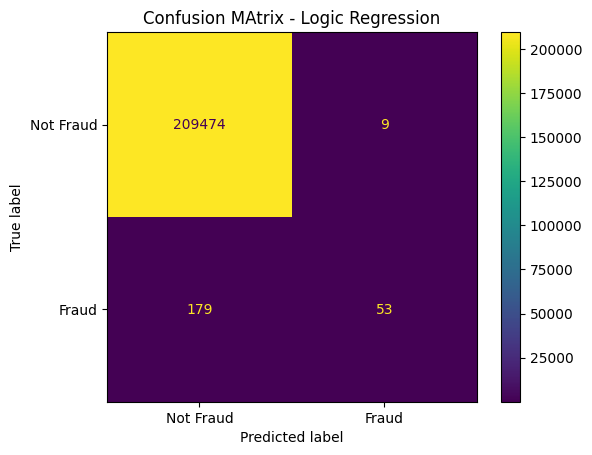

In [38]:

# classification report - LR

print("Classification Report- Logiistic Regression")
print(classification_report(Y_test,y_pred))

#confusion matrix - LR

confusion_matrix_lr = confusion_matrix(Y_test,y_pred.round())
print("Confusion Matrix - Logistic Regression")
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr,display_labels=display_labels)
matrix.plot()
plt.title("Confusion MAtrix - Logic Regression")
plt.show()

precision_logistic_regresssion = precision_score(Y_test,y_pred)
recall_logistic_regression = recall_score(Y_test, y_pred)

Recall would be the best performance matric to evaluate our model.We can increase the value of recall by hyperparameter tunning.
For this Decision TRee and Random Forest would be good for our project as theya are having good accuracy and recall.

# COMPARISON

In [39]:
algorithms = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracy_scores = [random_forest_score,decision_tree_score ,logic_regression_score]
precision_scores = [precision_random_forest, precision_decision_tree, precision_logistic_regresssion]
recall_scores = [recall_random_forest, recall_decision_tree, recall_logistic_regression]


data = {
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}



In [40]:
comparison = pd.DataFrame(data)
print(comparison)

             Algorithm   Accuracy  Precision    Recall
0        Random Forest  99.967098   0.945355  0.745690
1        Decision Tree  99.948025   0.763948  0.767241
2  Logistic Regression  99.910355   0.854839  0.228448


HYPERPARAMETER TUNNING REQUIRES HIGH GPU